# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import sys
print(sys.path)

['/Users/tomwildun/Documents/UTA-VIRT-DATA-PT-06-2023-U-LOLC/02-Homework/11-Data-Collection/Starter_Code', '/Users/tomwildun/anaconda3/envs/testmojave/lib/python39.zip', '/Users/tomwildun/anaconda3/envs/testmojave/lib/python3.9', '/Users/tomwildun/anaconda3/envs/testmojave/lib/python3.9/lib-dynload', '', '/Users/tomwildun/anaconda3/envs/testmojave/lib/python3.9/site-packages']


In [ ]:
!conda install -y matplotlib

In [5]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [13]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [14]:
# Create a Beautiful Soup Object
html = browser.html

In [15]:
# Extract all rows of data
soup = BeautifulSoup(html, 'html.parser')

In [18]:
# Find the table containing the data
table = soup.find('table')

In [19]:
# Extract header row
header_row = table.find('tr')
headers = [th.text for th in header_row.find_all('th')]

In [20]:
# Extract data rows
data_rows = table.find_all('tr', class_='data-row')
data = []
for row in data_rows:
    cells = row.find_all('td')
    row_data = [cell.text for cell in cells]
    data.append(row_data)

In [22]:
# Print the extracted data
print("Headers:", headers)
for row_data in data[:10]:  # Here we slice the list to take only the first 10 rows for printing
    print(row_data)

Headers: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [23]:
# Create an empty list
rows_list = []
# Loop through the scraped data to create a list of rows
for row_data in data:
    row_dict = {
        'id': row_data[0],
        'terrestrial_date': row_data[1],
        'sol': row_data[2],
        'ls': row_data[3],
        'month': row_data[4],
        'min_temp': float(row_data[5]),  # Convert to float as it's a temperature
        'pressure': float(row_data[6])   # Convert to float as it's a pressure value
    }
    rows_list.append(row_dict)

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(rows_list)

# Display the DataFrame
print(df.head(10))  # Display the first 10 rows


    id terrestrial_date sol   ls month  min_temp  pressure
0    2       2012-08-16  10  155     6     -75.0     739.0
1   13       2012-08-17  11  156     6     -76.0     740.0
2   24       2012-08-18  12  156     6     -76.0     741.0
3   35       2012-08-19  13  157     6     -74.0     732.0
4   46       2012-08-20  14  157     6     -74.0     740.0
5   57       2012-08-21  15  158     6     -78.0     740.0
6   68       2012-08-22  16  158     6     -77.0     740.0
7   79       2012-08-23  17  159     6     -76.0     742.0
8  112       2012-08-27  21  161     6     -74.0     741.0
9  114       2012-08-28  22  162     6     -74.0     742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
# Examine data type of each column
df.dtypes

id                   object
terrestrial_date     object
sol                  object
ls                   object
month                object
min_temp            float64
pressure            float64
dtype: object

In [27]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')

In [28]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()

print(month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [30]:
# 2. How many Martian days' worth of data are there? --1867
# Get the number of unique sol values
unique_sol_count = df['sol'].nunique()

print(unique_sol_count)

1867


In [32]:
# 3. What is the average low temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


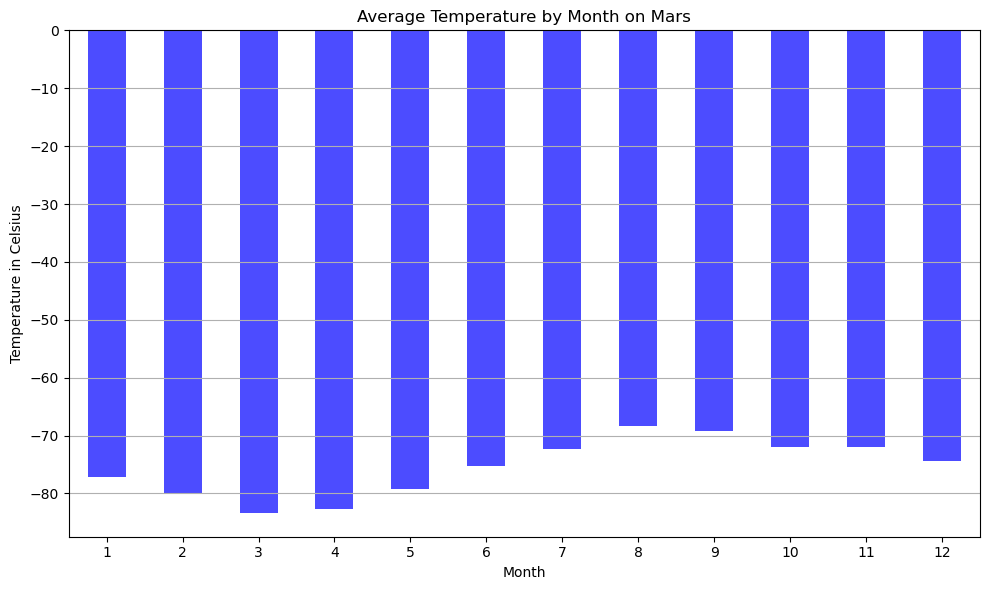

In [33]:
# Plot the average temperature by month
plt.figure(figsize=(10,6))
avg_min_temp_by_month.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # This will make the month numbers display horizontally
plt.tight_layout()
plt.grid(axis='y')
plt.show()

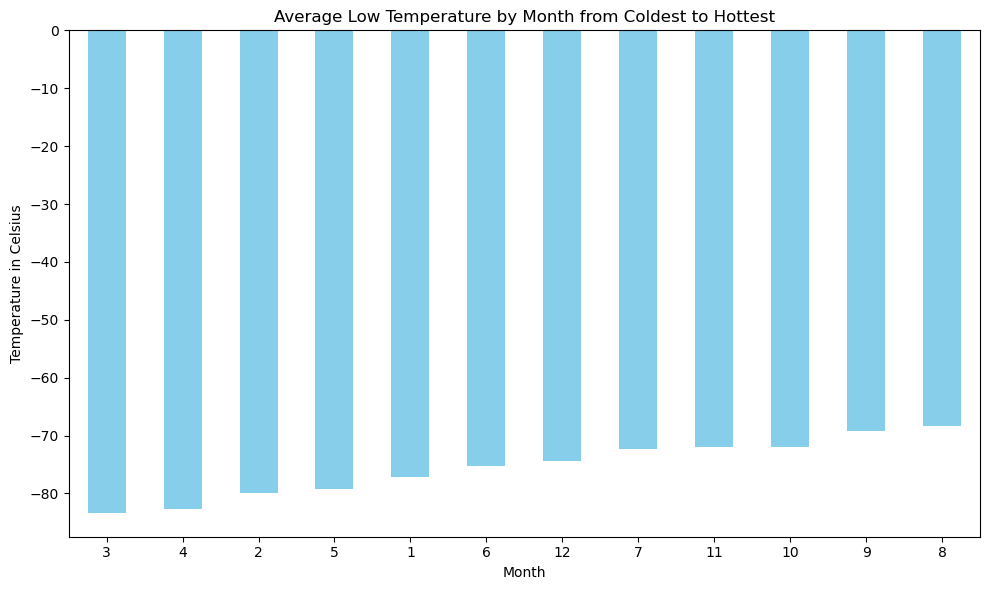

In [36]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperatures from coldest to hottest
sorted_avg_temps = avg_min_temp_by_month.sort_values()

plt.figure(figsize=(10, 6))
sorted_avg_temps.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Low Temperature by Month from Coldest to Hottest')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


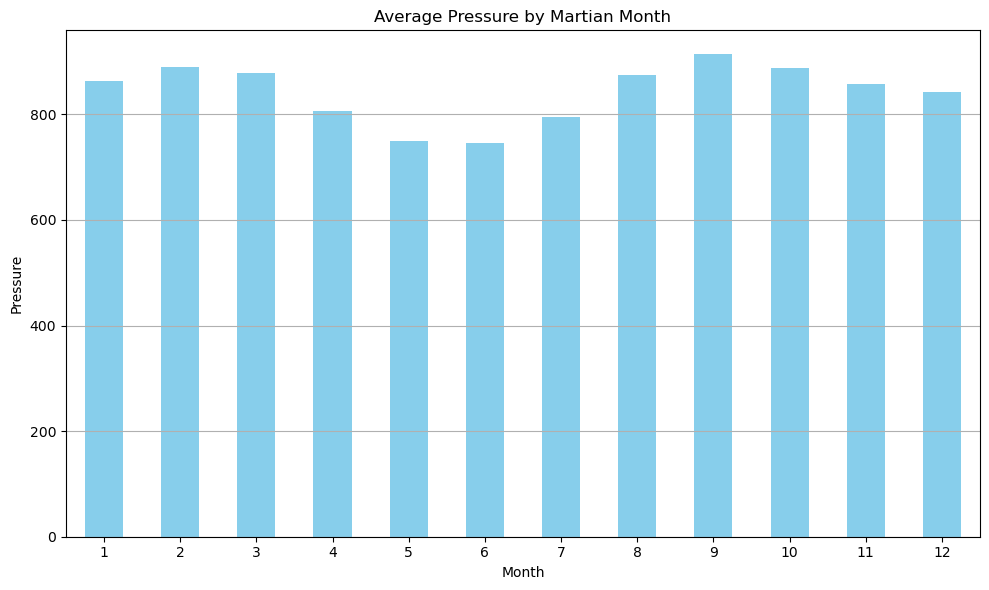

In [38]:
# Plot the average pressure by month

# Calculate the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot
plt.figure(figsize=(10,6))
avg_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

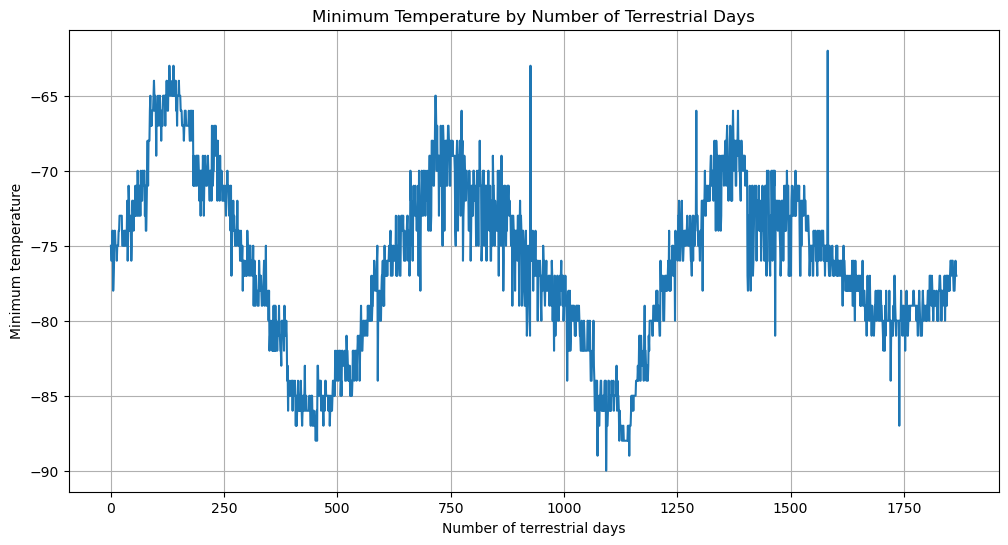

In [40]:
# Calculate average minimum temperature by terrestrial days
avg_min_temp_by_day = df.groupby(df.index)['min_temp'].mean()

# Plot
plt.figure(figsize=(12,6))
avg_min_temp_by_day.plot(kind='line')
plt.title('Minimum Temperature by Number of Terrestrial Days')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.grid(True)

plt.show()

In [44]:
On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
df.to_csv('MarsAnalysis.csv', index=False)

In [48]:
browser.quit()